# Bitcoin Yahoo Finanance

In [75]:
import sys ; print(sys.version)

3.8.10 (default, Nov 14 2022, 12:59:47) 
[GCC 9.4.0]


In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')
path = "/content/gdrive/MyDrive/Colab Notebooks/AI_ML/BTC_PREDICTION/"

Mounted at /content/gdrive/


In [2]:
import pandas as pd
df = pd.read_csv(path + 'BTC-USD.csv')
df = df[['Date', 'Close']]
df['Date'] = pd.to_datetime(df.pop('Date'))

In [ ]:
df.describe()

,Close
count,3025.000000
mean,12858.495306
std,16192.954671
min,178.102997
25%,673.336975
50%,7096.184570
75%,16817.535156
max,67566.828125


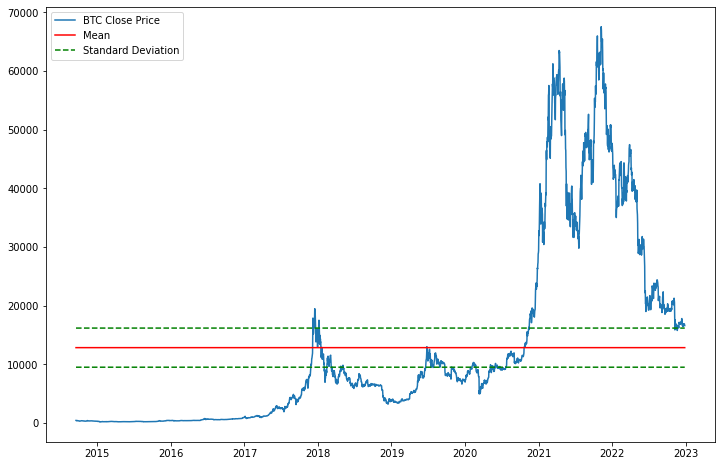

In [ ]:
import matplotlib.pyplot as plt

l = len(df.Date)
mean = [df.Close.mean()]*l
sd1 = [df.Close.std()]*l
sd2 = [df.Close.mean()-abs(df.Close.mean() - df.Close.std())]*l
min, max = df.Close.min(), df.Close.max()

plt.figure(figsize=(12,8))
plt.plot(df.Date, df.Close)
plt.plot(df.Date, mean, color='r')
plt.plot(df.Date, sd1, linestyle='dashed', color='g'); plt.plot(df.Date, sd2, linestyle='dashed', color='g')
plt.legend(['BTC Close Price', 'Mean', 'Standard Deviation'])



(array([2.35466223e-04, 2.18296811e-05, 4.09613118e-05, 1.93769080e-05,
        4.88101859e-05, 5.15082363e-05, 5.32251775e-05, 3.99802025e-05,
        2.37918996e-05, 4.16971437e-06, 5.15082363e-06, 5.64137827e-06,
        1.37355297e-05, 7.11304216e-06, 1.96221853e-05, 9.81109264e-06,
        3.92443705e-06, 6.62248753e-06, 2.45277316e-07, 9.81109264e-07,
        4.90554632e-07, 4.90554632e-06, 3.92443705e-06, 4.66026900e-06,
        4.66026900e-06, 4.16971437e-06, 5.15082363e-06, 7.60359679e-06,
        8.09415142e-06, 7.60359679e-06, 5.88665558e-06, 7.60359679e-06,
        4.90554632e-06, 3.43388242e-06, 1.00563700e-05, 4.66026900e-06,
        7.11304216e-06, 3.18860511e-06, 1.96221853e-06, 2.20749584e-06,
        2.69805047e-06, 4.41499169e-06, 5.88665558e-06, 4.16971437e-06,
        2.45277316e-06, 3.43388242e-06, 2.20749584e-06, 9.81109264e-07,
        9.81109264e-07, 4.90554632e-07]),
 array([  178.102997  ,  1525.87749956,  2873.65200212,  4221.42650468,
         5569.20100724

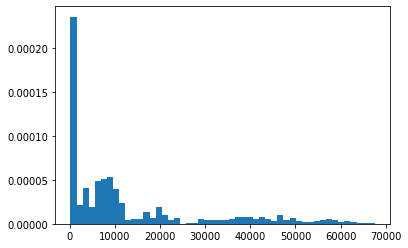

In [ ]:
plt.hist(df.Close, bins=50, density=True)


UFuncTypeError: ignored

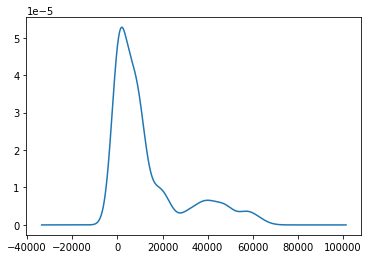

In [ ]:
#df.plot.density()
df.plot.kde()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


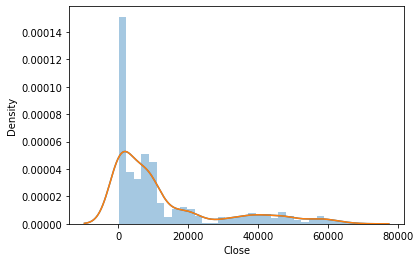

In [ ]:
import seaborn as sns

sns.distplot(df.Close)
sns.kdeplot(df.Close)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


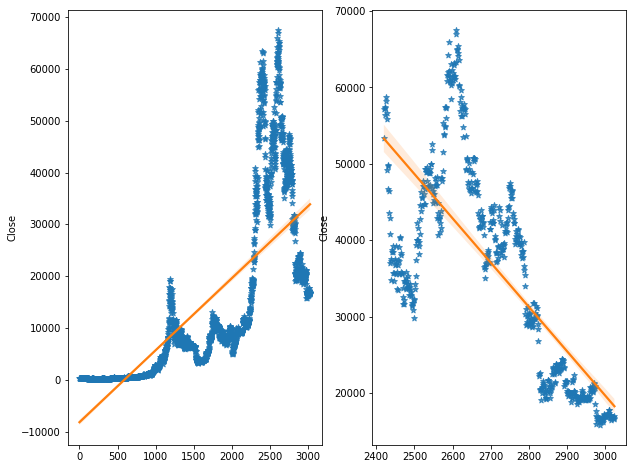

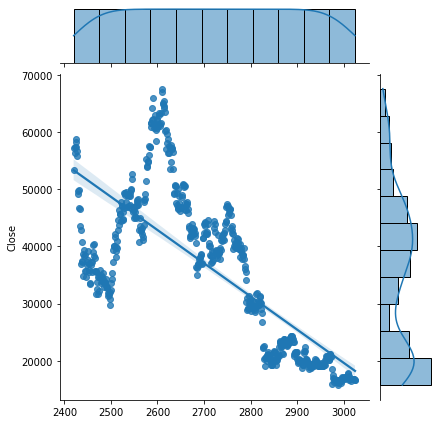

In [ ]:

#sns.scatterplot(y=df.Close, x=df.Date)
#sns.swarmplot(y=df.Close, x=df.Close)
fig, ax = plt.subplots(1,2, figsize=(10,8))
sns.regplot(ax=ax[0], x=[range(0, l)], y=df.Close, line_kws={"color": "C1"}, marker='*')

train = int(l*0.8)
val_y = df[train:].Close
val_x = list(range(train, l, 1))
sns.regplot(ax=ax[1], x=val_x, y=val_y, line_kws={"color": "C1"}, marker='*')

sns.jointplot(val_x, val_y, kind='reg')


In [44]:
data = pd.DataFrame()

data['Target-7'] = df.Close.shift(7)
data['Target-6'] = df.Close.shift(6)
data['Target-5'] = df.Close.shift(5)
data['Target-4'] = df.Close.shift(4)
data['Target-3'] = df.Close.shift(3)
data['Target-2'] = df.Close.shift(2)
data['Target-1'] = df.Close.shift(1)
data['Target'] = df.Close
data.index = df.index
length = len(data.index) - 7
data = data.tail(length)
data

,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
7,457.334015,424.440002,394.795990,408.903992,398.821014,402.152008,435.790985,423.204987
8,424.440002,394.795990,408.903992,398.821014,402.152008,435.790985,423.204987,411.574005
9,394.795990,408.903992,398.821014,402.152008,435.790985,423.204987,411.574005,404.424988
10,408.903992,398.821014,402.152008,435.790985,423.204987,411.574005,404.424988,399.519989
11,398.821014,402.152008,435.790985,423.204987,411.574005,404.424988,399.519989,377.181000
...,...,...,...,...,...,...,...,...
3020,16795.091797,16757.976563,16439.679688,16906.304688,16817.535156,16830.341797,16796.953125,16847.755859
3021,16757.976563,16439.679688,16906.304688,16817.535156,16830.341797,16796.953125,16847.755859,16841.986328
3022,16439.679688,16906.304688,16817.535156,16830.341797,16796.953125,16847.755859,16841.986328,16919.804688
3023,16906.304688,16817.535156,16830.341797,16796.953125,16847.755859,16841.986328,16919.804688,16717.173828


In [45]:
import numpy as np

X_train = np.array(data[['Target-2','Target-1']]).reshape(3018,2)
y_train = np.array(data['Target'])


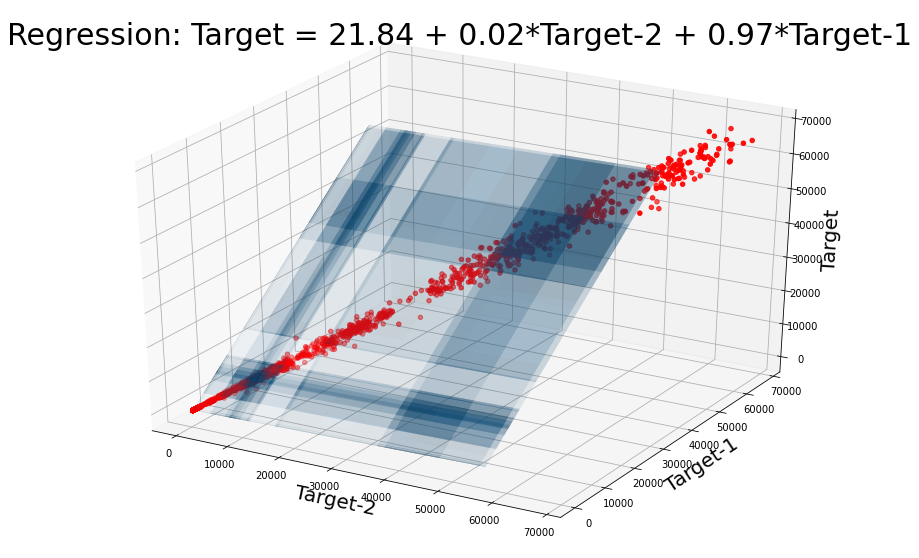

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

model = LinearRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_train)


fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, color='red')
ax.set_xlabel("Target-2", size=20)
ax.set_ylabel("Target-1", size=20)
ax.set_zlabel("Target", size=20)

coefs = model.coef_
intercept = model.intercept_
xs = np.tile(X_train[:,0], (3018, 1)) #np.tile(np.arange(61), (61,1))
ys = np.tile(X_train[:,1], (3018, 1)).T #np.tile(np.arange(61), (61,1)).T
zs = xs*coefs[0]+ys*coefs[1]+intercept


ax.plot_surface(xs,ys,zs, alpha=0.05)
equation = "Regression: Target = {:.2f} + {:.2f}*Target-2 + {:.2f}*Target-1".format(intercept, coefs[0],
                                                          coefs[1])
ax.set_title(equation, size=30)
plt.show()

In [71]:
data.iloc[:, :-1]

,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1
7,457.334015,424.440002,394.795990,408.903992,398.821014,402.152008,435.790985
8,424.440002,394.795990,408.903992,398.821014,402.152008,435.790985,423.204987
9,394.795990,408.903992,398.821014,402.152008,435.790985,423.204987,411.574005
10,408.903992,398.821014,402.152008,435.790985,423.204987,411.574005,404.424988
11,398.821014,402.152008,435.790985,423.204987,411.574005,404.424988,399.519989
...,...,...,...,...,...,...,...
3020,16795.091797,16757.976563,16439.679688,16906.304688,16817.535156,16830.341797,16796.953125
3021,16757.976563,16439.679688,16906.304688,16817.535156,16830.341797,16796.953125,16847.755859
3022,16439.679688,16906.304688,16817.535156,16830.341797,16796.953125,16847.755859,16841.986328
3023,16906.304688,16817.535156,16830.341797,16796.953125,16847.755859,16841.986328,16919.804688


In [73]:
import numpy as np

X_train = np.array(data['Target-1']).reshape(3018,1)
y_train = np.array(data['Target'])

model = LinearRegression()
model.fit(X_train, y_train)
print(model.intercept_, model.coef_)


X_train = np.array(data[['Target-2', 'Target-1']]).reshape(3018,2)
y_train = np.array(data['Target'])

model = LinearRegression()
model.fit(X_train, y_train)
print(model.intercept_, model.coef_)


X_train = np.array(data[['Target-3', 'Target-2', 'Target-1']]).reshape(3018,3)
y_train = np.array(data['Target'])

model = LinearRegression()
model.fit(X_train, y_train)
print(model.intercept_, model.coef_)


X_train = np.array(data.iloc[:, :-1]).reshape(3018,7)
y_train = np.array(data['Target'])

model = LinearRegression()
model.fit(X_train, y_train)
print(model.intercept_, model.coef_)




22.068313311214297 [0.99870309]
21.843145916838694 [0.02499813 0.97373293]
21.878910112884114 [-0.00426217  0.02914906  0.97383954]
22.7006997067856 [-0.02304991  0.00719488 -0.01677379  0.0136796   0.01532672  0.02993064
  0.97231716]


MAE: 265.7764528528177
RMSE: 324.2820217666393
Equation: y = -1213.36 + 60.25x1 + 59.67x2


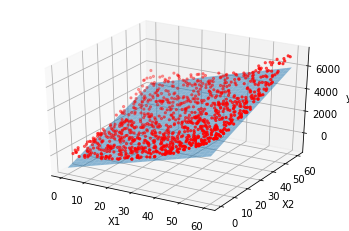

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model

from mpl_toolkits.mplot3d import Axes3D

X_train = np.random.rand(2000).reshape(1000,2)*60
y_train = (X_train[:, 0]**2)+(X_train[:, 1]**2)
X_test = np.random.rand(200).reshape(100,2)*60
y_test = (X_test[:, 0]**2)+(X_test[:, 1]**2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, marker='.', color='red')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")

model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE: {}".format(np.abs(y_test-y_pred).mean()))
print("RMSE: {}".format(np.sqrt(((y_test-y_pred)**2).mean())))

coefs = model.coef_
intercept = model.intercept_
xs = np.tile(np.arange(61), (61,1))
ys = np.tile(np.arange(61), (61,1)).T
zs = xs*coefs[0]+ys*coefs[1]+intercept
print("Equation: y = {:.2f} + {:.2f}x1 + {:.2f}x2".format(intercept, coefs[0],
                                                          coefs[1]))

ax.plot_surface(xs,ys,zs, alpha=0.5)
plt.show()

# Crypto & SM Sentiments

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/pratikpv/predicting_bitcoin_market/master/crypto_data_news_reddit_final.csv'
df = pd.read_csv(url, index_col=0, parse_dates=[0])
df.head()

,open_BTCUSDT,high_BTCUSDT,low_BTCUSDT,close_BTCUSDT,volume_BTCUSDT,close_LTCUSD,volume_LTCUSD,close_ETHUSD,volume_ETHUSD,gnews_flair,...,gnews_sid_neg,gnews_sid_neu,gnews_sid_com,reddit_flair,reddit_tb_polarity,reddit_tb_subjectivity,reddit_sid_pos,reddit_sid_neg,reddit_sid_neu,reddit_sid_com
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,13820.26,13820.26,13498.05,13557.88,210.213142,222.24,590.23,728.77,625.293831,0.04257,...,0.025222,0.909556,0.624667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-01 01:00:00,13557.88,13585.66,13250.50,13262.85,191.931776,215.20,698.36,724.27,710.891607,0.04257,...,0.025222,0.909556,0.624667,-0.267228,0.046199,0.257910,0.105625,0.091875,0.802500,0.181325
2018-01-01 02:00:00,13262.85,13400.00,13186.02,13320.00,169.456410,215.36,464.55,722.11,849.257651,0.04257,...,0.025222,0.909556,0.624667,-0.300781,-0.077217,0.273153,0.032000,0.019333,0.948667,0.330133
2018-01-01 03:00:00,13320.00,13515.44,13308.54,13372.00,80.455327,219.30,407.81,733.19,556.397003,0.04257,...,0.025222,0.909556,0.624667,0.082537,0.242468,0.404416,0.156286,0.025000,0.818714,0.280143
2018-01-01 04:00:00,13372.00,13499.83,13279.50,13483.06,127.212610,223.72,965.39,738.59,1247.722800,0.04257,...,0.025222,0.909556,0.624667,0.443654,0.235317,0.321429,0.153143,0.005143,0.841714,0.341757


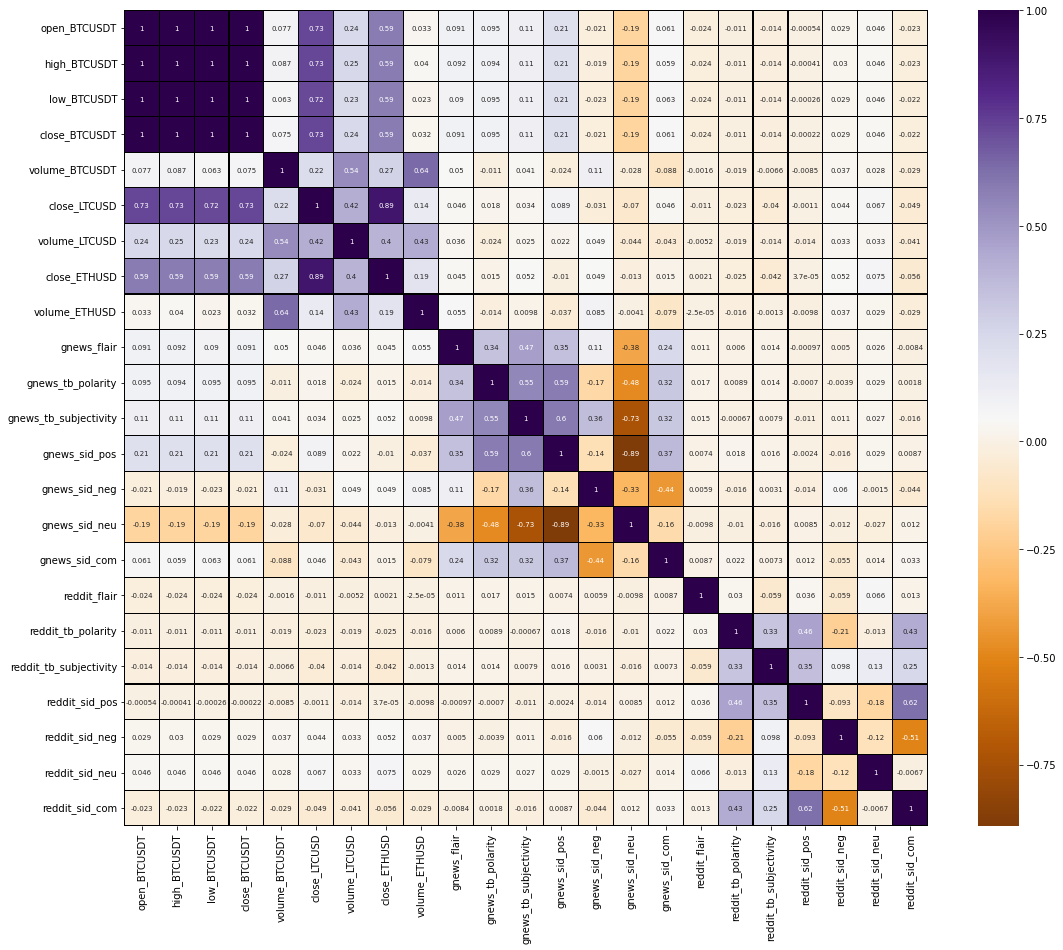

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_mtx = df.corr()
plt.figure(figsize=(18, 15))
sns.heatmap(corr_mtx, cmap='PuOr', square=False, annot=True, annot_kws={"size": 7}, linewidths=0.1, linecolor='k')
plt.show()

In [ ]:
# nonsense
from sklearn.metrics import r2_score

r21 = r2_score(df['open_BTCUSDT'], df['high_BTCUSDT']) * 0.78
r22 = abs(r2_score(df.open_BTCUSDT, df.close_LTCUSD)) * 0.15
r23= abs(r2_score(df.open_BTCUSDT, df.close_ETHUSD)) * 0.08

r22

1.19339076528739

# LSTM

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('BTC-USD.csv', index_col=(0))

dates = np.array(df.index)

# Load your data
data = np.array(df['Close'])                   #np.loadtxt("BTC-USD.csv", usecols=(1,2,3))

# Normalize the data
#mean = np.mean(data)
#std = np.std(data)
#data = (data - mean) / std

# Define the number of time steps
timesteps = 30

# Split the data into input and output sequences
X = []
y = []
for i in range(timesteps, len(data)):
    X.append(data[i-timesteps:i])
    y.append(data[i])

# Convert the sequences to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split::]
y_test = y[split::]
dates_train = dates[:split]
dates_test = dates[split:]



In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X)
print(df.Close)

(2380, 30)
(596, 30)
[[  457.334015   424.440002   394.79599  ...   400.869995   394.77301
    382.556   ]
 [  424.440002   394.79599    408.903992 ...   394.77301    382.556
    383.757996]
 [  394.79599    408.903992   398.821014 ...   382.556      383.757996
    391.441986]
 ...
 [20602.816406 18541.271484 15880.780273 ... 17130.486328 16974.826172
  17089.503906]
 [18541.271484 15880.780273 17586.771484 ... 16974.826172 17089.503906
  16848.126953]
 [15880.780273 17586.771484 17034.292969 ... 17089.503906 16848.126953
  17233.474609]]
Date
2014-09-17      457.334015
2014-09-18      424.440002
2014-09-19      394.795990
2014-09-20      408.903992
2014-09-21      398.821014
                  ...     
2022-12-05    16974.826172
2022-12-06    17089.503906
2022-12-07    16848.126953
2022-12-08    17233.474609
2022-12-09    17256.478516
Name: Close, Length: 3006, dtype: float64


In [ ]:
X_train.shape
#dates_test.shape
#len(dates)*0.8
#X_test.shape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(None, 30)),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test data
y_pred = model.predict(X_test)

# Plot the predictions against the true values
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Prediction')
plt.legend()
plt.show()

Epoch 1/50


ValueError: ignored

In [ ]:
len(dates_train)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

#X_train = np.reshape(X_train, (X_train.shape[0], 1))
#X_test = np.reshape(X_test, (X_test.shape[0], 1))
#X_test.shape

print(X_train[:, 0, 0].shape, dates_train.shape)

(2380,) (2380,)


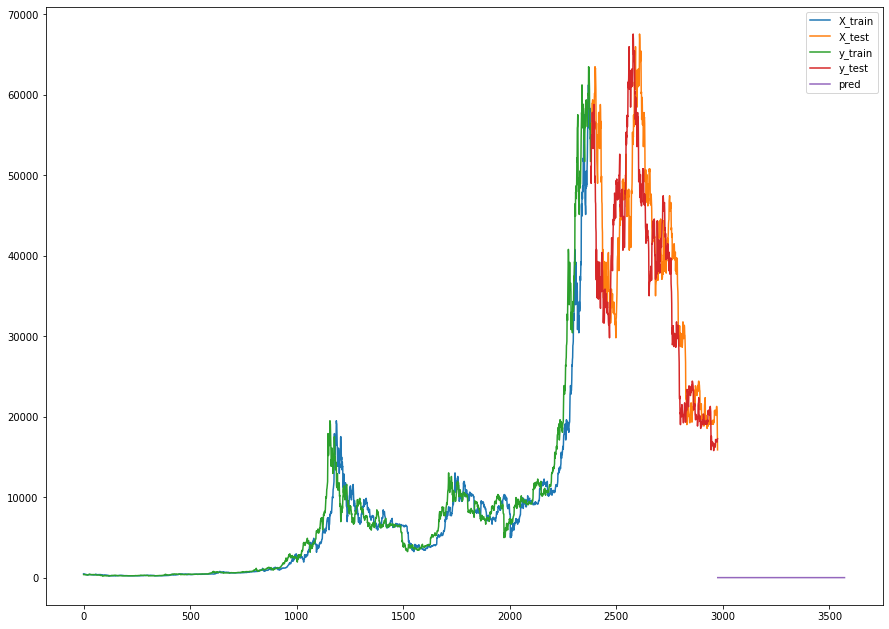

In [ ]:
#X_train, X_test, y_train, y_test = X_train.reshape(1, 1), X_test.reshape(1, 1), y_train.reshape(1, 1), y_test.reshape(1, 1)

'''plt.plot(X_train[:, 0, 0], dates_train)
plt.plot(X_test[:, 0, 0], dates_test )
plt.plot(y_train[:, 0, 0], dates_train)
plt.plot(y_test[:, 0, 0], dates_test)
plt.plot(y_pred[:, 0, 0], dates_test)'''

plt.figure(figsize=(15,11))
plt.plot(range(len(X_train)), X_train[:, 0, 0])
plt.plot(range(len(X_train), len(X_train)+len(X_test)), X_test[:, 0])
plt.plot(range(len(y_train)), y_train[:])
plt.plot(range(len(y_train), len(y_train)+len(y_test)), y_test[:])
plt.plot(range(len(y_train)+len(y_test), len(y_train)+len(y_test) + len(y_pred)), y_pred[:,0])

plt.legend(['X_train', 'X_test', 'y_train', 'y_test', 'pred'])

In the example above, we have a sequence length of 30, which means the LSTM will receive 30 consecutive values of the bitcoin price as input. The model consists of two LSTM layers with 50 neurons each, followed by a dense output layer with 1 neuron. The activation function for the LSTM cells is the default tanh function, which is suitable for most time-series forecasting problems. The model is trained for 50 epochs using the Adam optimizer and mean squared error loss. Finally, the predictions are plotted against the true values to visualize the performance of the model.

Note: This is just an example, and you may need to fine-tune the hyperparameters, such as the number of neurons, the number of layers, the activation functions, the optimizer, and the loss function, to get the best performance for your specific problem.

In [ ]:
# 0-80% training interval
q_80 = int(len(dates) * 0.80)

# 80-90% validation interval
q_90 = int(len(dates) * 0.90)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

The purpose of normalizing the data is to scale the features to a similar range, so that no one feature dominates the others. Normalization helps to stabilize the training process and to prevent the learning algorithm from getting stuck in suboptimal regions of the parameter space. It also helps to speed up the convergence of the optimization algorithm.

There are several methods for normalizing the data, such as min-max scaling, standardization, and normalization. The most common method is min-max scaling, which transforms the data to the range [0, 1]. Standardization transforms the data to have a mean of 0 and a standard deviation of 1, which can be useful for Gaussian-distributed data. Normalization scales the data to have a unit length, which can be useful for high-dimensional data.